# Diva comparison

Comparing the results on the Attacks on Diva using the `5MostSure Voting Classifier`

In [1]:
from pathlib import Path
import sys
from numba import njit

UTILS_RELATIVE_PATH = "../../../"
sys.path.append(UTILS_RELATIVE_PATH)

MLEM_RELATIVE_PATH = "../../../../"
sys.path.append(MLEM_RELATIVE_PATH)

LIME_RELATIVE_PATH = "../../../../lime/"
sys.path.append(LIME_RELATIVE_PATH)

import logging
logging.disable('DEBUG')

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()
import numpy as np
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from mlem.ensemble import KMostSureVotingClassifier
from utils.attack_evaluation import evaluate_attack
from utils.models import load_pickle_bz2
from utils.dataloading.attack_models import load_attack_models

# Loading the Diva data

In [3]:
from utils.dataloading.diva import load_diva_data, load_diva_randomforest # type: ignore
DATASET = "diva"
assert DATASET == "diva" # to avoid problems when duplicating the notebook
BB = load_diva_randomforest()
BB_DATA = load_diva_data("diva-blackbox-data2.npz")

print(classification_report(BB_DATA['y_test'], BB.predict(BB_DATA['X_test'])))

              precision    recall  f1-score   support

           0       0.92      0.95      0.94      2094
           1       0.85      0.77      0.81       745

    accuracy                           0.90      2839
   macro avg       0.89      0.86      0.87      2839
weighted avg       0.90      0.90      0.90      2839



In the following experiments:
* Data: indicates the data used to create the Explainer.
* Attack: indicates the data used to create the Shadow Models.
* Explainer: The Explainer used (Either the Lime Regressor or the Decision Tree).
* Filter: if true the *Data* have been filtered using mean + 3std.
* Instances Selection: 3-elems per quantile or distance-based approach

##### Data: `Lime Generated` Attack: `Lime Generated` Explainer: `Decision Tree` Filter: `False` Instances Selection: `Quantiles`
Here the attack dataset is the one generated by LIME, the same one used to train the Decision Trees. The generated points have not been filtered.

In [4]:
PATH = Path('../../decision_tree/decision_tree_dataset_no3std/adult/experiment_output')
assert PATH.exists()

report full
              precision    recall  f1-score   support

          in       0.70      0.93      0.80      6624
         out       0.31      0.08      0.12      2839

    accuracy                           0.67      9463
   macro avg       0.51      0.50      0.46      9463
weighted avg       0.58      0.67      0.60      9463


Class 0
              precision    recall  f1-score   support

          in       0.70      0.98      0.81      4965
         out       0.36      0.03      0.05      2165

    accuracy                           0.69      7130
   macro avg       0.53      0.50      0.43      7130
weighted avg       0.59      0.69      0.58      7130


Class 1
              precision    recall  f1-score   support

          in       0.71      0.77      0.74      1659
         out       0.30      0.24      0.27       674

    accuracy                           0.62      2333
   macro avg       0.50      0.50      0.50      2333
weighted avg       0.59      0.62      0.60 

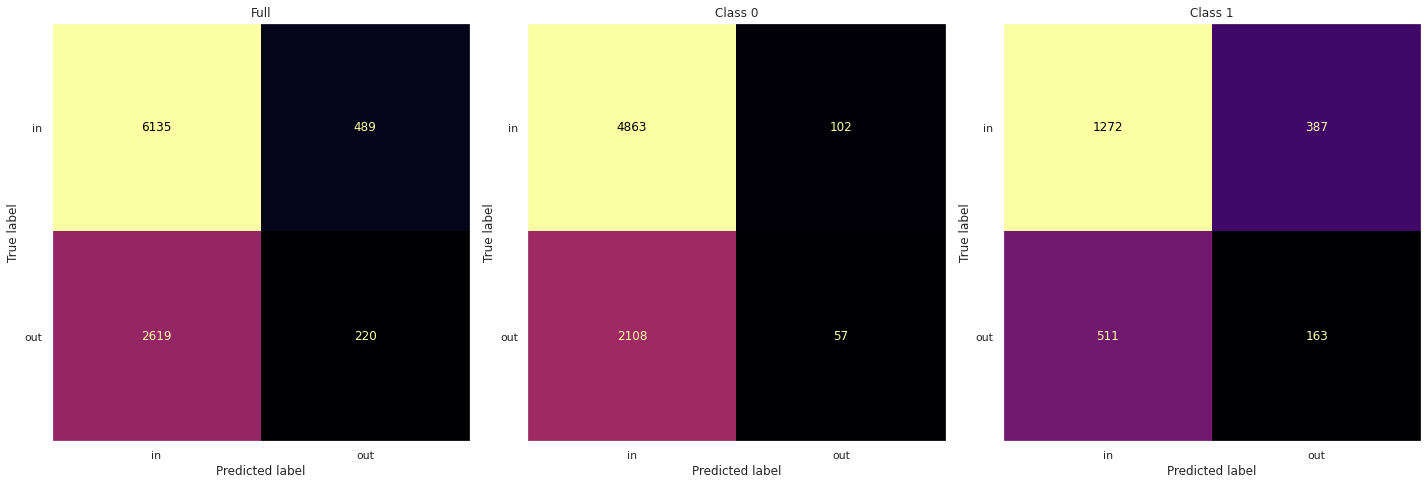

In [5]:
attack_0, attack_1, instances = load_attack_models(PATH)
ensemble0 = KMostSureVotingClassifier(attack_0)
ensemble1 = KMostSureVotingClassifier(attack_1)
evaluate_attack(ensemble0, ensemble1, BB, BB_DATA)

##### Data: `Lime Generated` Attack: `Lime Generated` Explainer: `Decision Tree` Filter: `True` Instances Selection: `Quantiles`
Here the attack dataset is the one generated by LIME, the same one used to train the Decision Trees. The generated points have been filtered.

In [6]:
PATH = Path(f"../../decision_tree/decision_tree_dataset/adult/experiment_output")
assert PATH.exists()

report full
              precision    recall  f1-score   support

          in       0.70      0.95      0.81      6624
         out       0.29      0.04      0.07      2839

    accuracy                           0.68      9463
   macro avg       0.49      0.50      0.44      9463
weighted avg       0.58      0.68      0.59      9463


Class 0
              precision    recall  f1-score   support

          in       0.70      0.99      0.82      4965
         out       0.24      0.00      0.01      2165

    accuracy                           0.69      7130
   macro avg       0.47      0.50      0.41      7130
weighted avg       0.56      0.69      0.57      7130


Class 1
              precision    recall  f1-score   support

          in       0.71      0.83      0.77      1659
         out       0.29      0.17      0.21       674

    accuracy                           0.64      2333
   macro avg       0.50      0.50      0.49      2333
weighted avg       0.59      0.64      0.61 

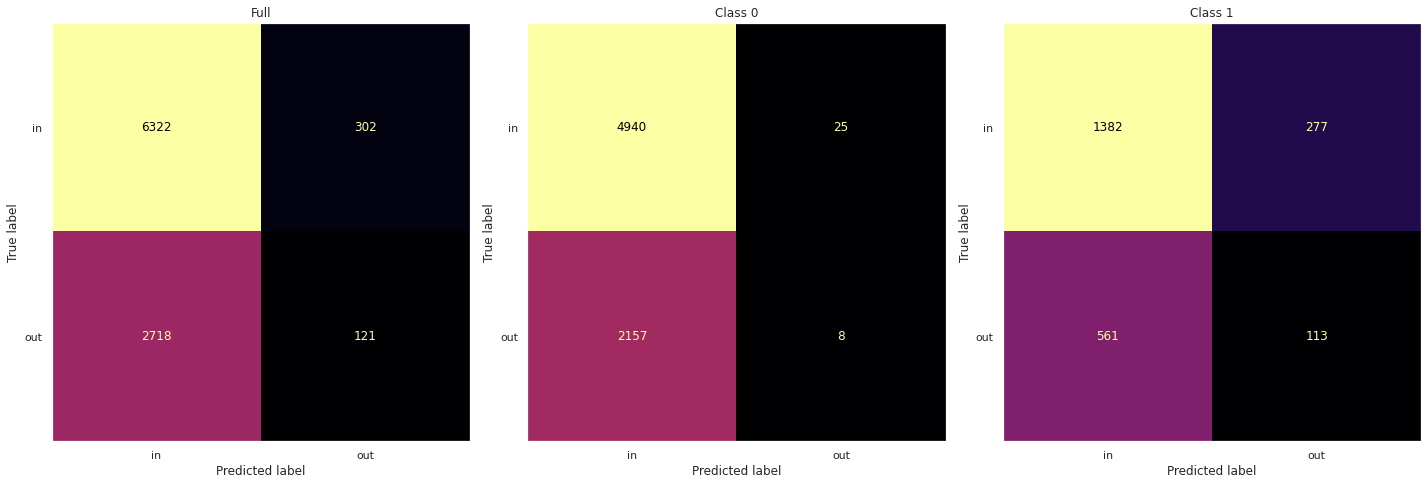

In [7]:
attack_0, attack_1, instances = load_attack_models(PATH)
ensemble0 = KMostSureVotingClassifier(attack_0)
ensemble1 = KMostSureVotingClassifier(attack_1)
evaluate_attack(ensemble0, ensemble1, BB, BB_DATA)

##### Data: `Lime Generated` Attack: `Lime Generated` Explainer: `Regressor` Filter: `False` Instances Selection: `Distance`
Here the attack dataset is the one generated by LIME, the same one used to train the Decision Trees. The generated points have not been filtered.

In [8]:
PATH = Path('../../standard_lime/lime_generated/adult/experiment_output')
assert PATH.exists()

report full
              precision    recall  f1-score   support

          in       0.70      0.72      0.71      6624
         out       0.30      0.29      0.30      2839

    accuracy                           0.59      9463
   macro avg       0.50      0.50      0.50      9463
weighted avg       0.58      0.59      0.58      9463


Class 0
              precision    recall  f1-score   support

          in       0.70      0.92      0.80      4965
         out       0.37      0.11      0.17      2165

    accuracy                           0.67      7130
   macro avg       0.53      0.51      0.48      7130
weighted avg       0.60      0.67      0.61      7130


Class 1
              precision    recall  f1-score   support

          in       0.67      0.12      0.20      1659
         out       0.28      0.86      0.43       674

    accuracy                           0.33      2333
   macro avg       0.48      0.49      0.31      2333
weighted avg       0.56      0.33      0.26 

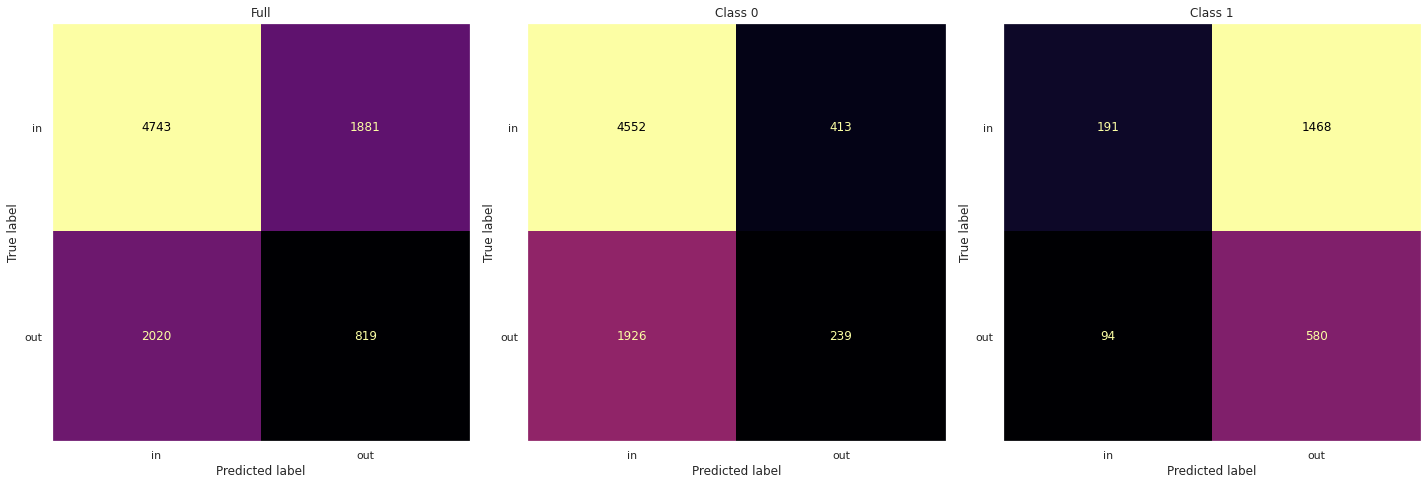

In [9]:
attack_0, attack_1, instances = load_attack_models(PATH)
ensemble0 = KMostSureVotingClassifier(attack_0)
ensemble1 = KMostSureVotingClassifier(attack_1)
evaluate_attack(ensemble0, ensemble1, BB, BB_DATA)

##### Data: `Lime Generated` Attack: `Lime Generated` Explainer: `Regressor` Filter: `True` Instances Selection: `Distance`
Here the attack dataset is the one generated by LIME, the same one used to train the Decision Trees. The generated points have been filtered.

In [10]:
PATH = Path('../../standard_lime/lime_generated_filter/adult/experiment_output')
assert PATH.exists()

report full
              precision    recall  f1-score   support

          in       0.70      0.78      0.74      6624
         out       0.31      0.23      0.26      2839

    accuracy                           0.61      9463
   macro avg       0.50      0.50      0.50      9463
weighted avg       0.58      0.61      0.59      9463


Class 0
              precision    recall  f1-score   support

          in       0.70      0.93      0.80      4965
         out       0.36      0.09      0.14      2165

    accuracy                           0.68      7130
   macro avg       0.53      0.51      0.47      7130
weighted avg       0.60      0.68      0.60      7130


Class 1
              precision    recall  f1-score   support

          in       0.70      0.31      0.43      1659
         out       0.29      0.68      0.40       674

    accuracy                           0.42      2333
   macro avg       0.50      0.50      0.42      2333
weighted avg       0.58      0.42      0.42 

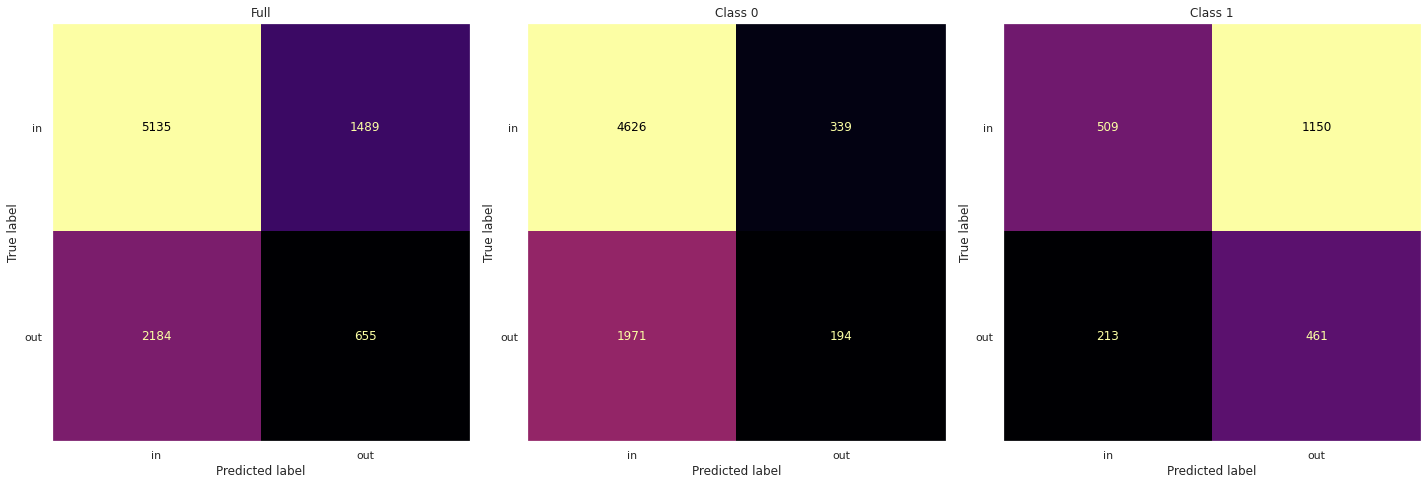

In [11]:
attack_0, attack_1, instances = load_attack_models(PATH)
ensemble0 = KMostSureVotingClassifier(attack_0)
ensemble1 = KMostSureVotingClassifier(attack_1)
evaluate_attack(ensemble0, ensemble1, BB, BB_DATA)

##### Data: `Statistical` on `Black Box Train` Attack: `Statistical` Explainer: `Decision Tree` Filter: `False` Instances Selection: `Quantiles`
Here the attack dataset is a newly generated statistical one, not the same used to create the `DTs`

In [12]:
PATH = Path('../../decision_tree/statistical_no3std/adult/experiment_output')
assert PATH.exists()

report full
              precision    recall  f1-score   support

          in       0.70      0.79      0.74      6624
         out       0.29      0.20      0.24      2839

    accuracy                           0.61      9463
   macro avg       0.49      0.49      0.49      9463
weighted avg       0.57      0.61      0.59      9463


Class 0
              precision    recall  f1-score   support

          in       0.70      0.97      0.81      4965
         out       0.37      0.05      0.08      2165

    accuracy                           0.69      7130
   macro avg       0.53      0.51      0.45      7130
weighted avg       0.60      0.69      0.59      7130


Class 1
              precision    recall  f1-score   support

          in       0.68      0.25      0.36      1659
         out       0.28      0.71      0.40       674

    accuracy                           0.38      2333
   macro avg       0.48      0.48      0.38      2333
weighted avg       0.56      0.38      0.37 

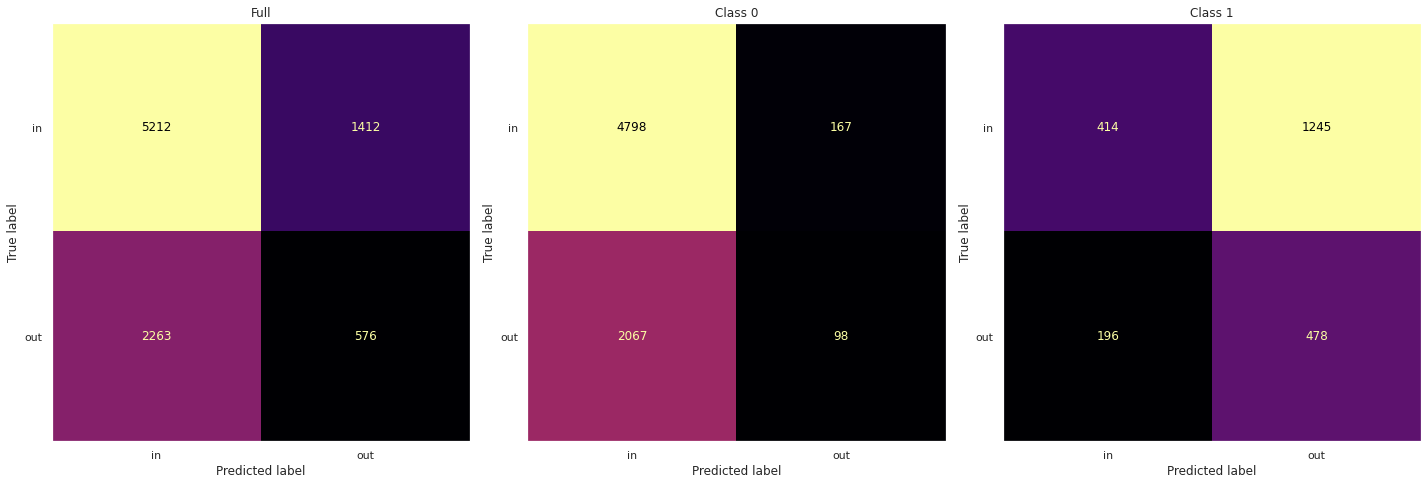

In [13]:
attack_0, attack_1, instances = load_attack_models(PATH)
ensemble0 = KMostSureVotingClassifier(attack_0)
ensemble1 = KMostSureVotingClassifier(attack_1)
evaluate_attack(ensemble0, ensemble1, BB, BB_DATA)

##### Data: `Statistical` on `Black Box Train` Attack: `Statistical` Explainer: `Decision Tree` Filter: `True` Instances Selection: `Quantiles`

Here the attack dataset is a newly generated statistical one, not the same used to create the `DTs`

In [14]:
PATH = Path('../../decision_tree/statistical/adult/experiment_output/')
assert PATH.exists()

report full
              precision    recall  f1-score   support

          in       0.70      0.93      0.80      6624
         out       0.32      0.08      0.12      2839

    accuracy                           0.67      9463
   macro avg       0.51      0.50      0.46      9463
weighted avg       0.59      0.67      0.60      9463


Class 0
              precision    recall  f1-score   support

          in       0.70      0.98      0.82      4965
         out       0.35      0.02      0.04      2165

    accuracy                           0.69      7130
   macro avg       0.53      0.50      0.43      7130
weighted avg       0.59      0.69      0.58      7130


Class 1
              precision    recall  f1-score   support

          in       0.72      0.78      0.75      1659
         out       0.31      0.24      0.27       674

    accuracy                           0.62      2333
   macro avg       0.51      0.51      0.51      2333
weighted avg       0.60      0.62      0.61 

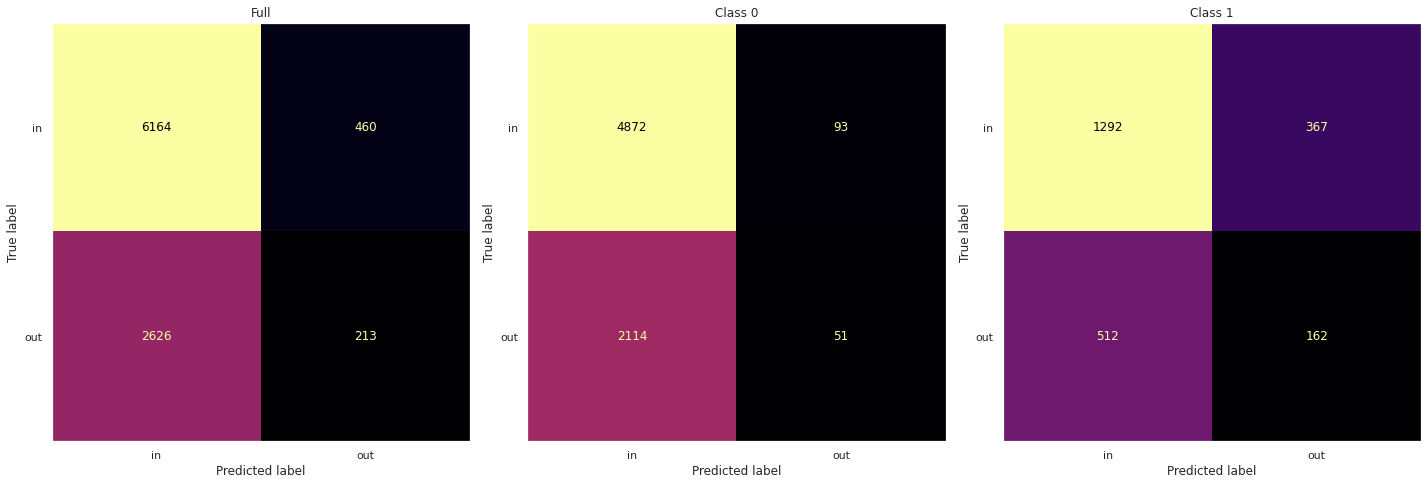

In [15]:
attack_0, attack_1, instances = load_attack_models(PATH)
ensemble0 = KMostSureVotingClassifier(attack_0)
ensemble1 = KMostSureVotingClassifier(attack_1)
evaluate_attack(ensemble0, ensemble1, BB, BB_DATA)

##### Data: `Statistical` on `Noisy dataset` Attack: `Statistical` Explainer: `Decision Tree` Filter: `False` Instances Selection: `Quantiles`
Here the attack dataset is a newly generated statistical one, not the same used to create the `DTs`

In [16]:
PATH = Path('../../decision_tree/statistical_noisy/adult/experiment_output/')
assert PATH.exists()

report full
              precision    recall  f1-score   support

          in       0.70      0.96      0.81      6624
         out       0.35      0.05      0.09      2839

    accuracy                           0.69      9463
   macro avg       0.53      0.51      0.45      9463
weighted avg       0.60      0.69      0.59      9463


Class 0
              precision    recall  f1-score   support

          in       0.70      0.96      0.81      4965
         out       0.37      0.06      0.10      2165

    accuracy                           0.68      7130
   macro avg       0.54      0.51      0.46      7130
weighted avg       0.60      0.68      0.59      7130


Class 1
              precision    recall  f1-score   support

          in       0.71      0.97      0.82      1659
         out       0.25      0.03      0.05       674

    accuracy                           0.70      2333
   macro avg       0.48      0.50      0.43      2333
weighted avg       0.58      0.70      0.60 

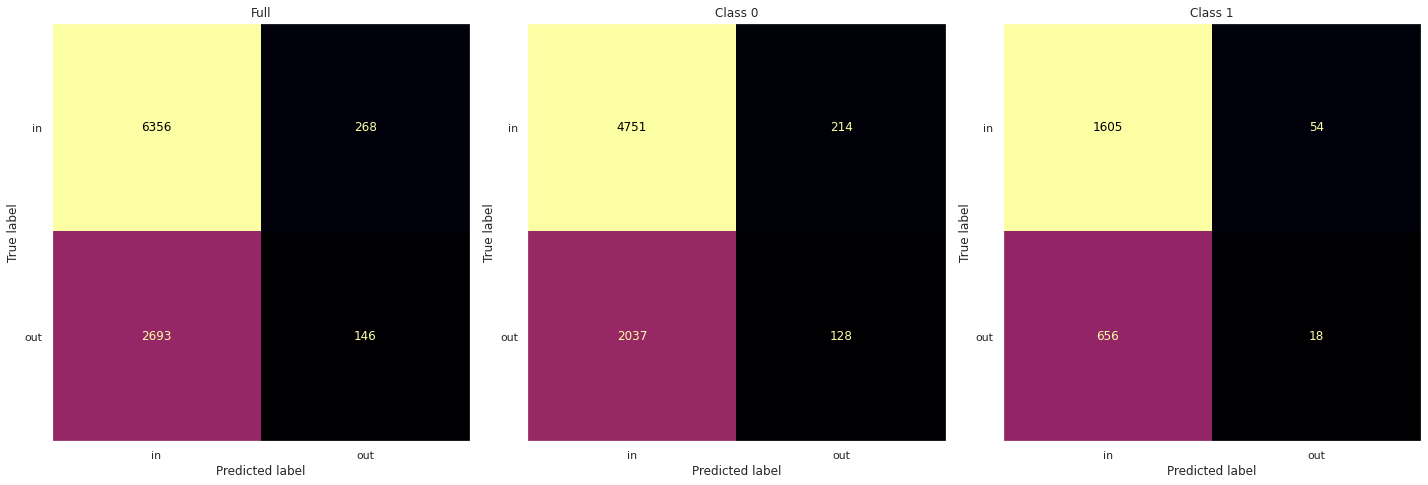

In [17]:
attack_0, attack_1, instances = load_attack_models(PATH)
ensemble0 = KMostSureVotingClassifier(attack_0)
ensemble1 = KMostSureVotingClassifier(attack_1)
evaluate_attack(ensemble0, ensemble1, BB, BB_DATA)

##### Data: `Statistical` on `Noisy dataset` Attack: `Statistical` Explainer: `Decision Tree` Filter: `True` Instances Selection: `Quantiles`
Here the attack dataset is a newly generated statistical one, not the same used to create the `DTs`

In [18]:
PATH = Path('../../decision_tree/statistical_noisy_filter/adult/experiment_output/')
assert PATH.exists()

report full
              precision    recall  f1-score   support

          in       0.67      0.08      0.15      6624
         out       0.30      0.91      0.45      2839

    accuracy                           0.33      9463
   macro avg       0.48      0.49      0.30      9463
weighted avg       0.56      0.33      0.24      9463


Class 0
              precision    recall  f1-score   support

          in       0.66      0.03      0.06      4965
         out       0.30      0.96      0.46      2165

    accuracy                           0.31      7130
   macro avg       0.48      0.50      0.26      7130
weighted avg       0.55      0.31      0.18      7130


Class 1
              precision    recall  f1-score   support

          in       0.68      0.23      0.34      1659
         out       0.28      0.73      0.40       674

    accuracy                           0.37      2333
   macro avg       0.48      0.48      0.37      2333
weighted avg       0.56      0.37      0.36 

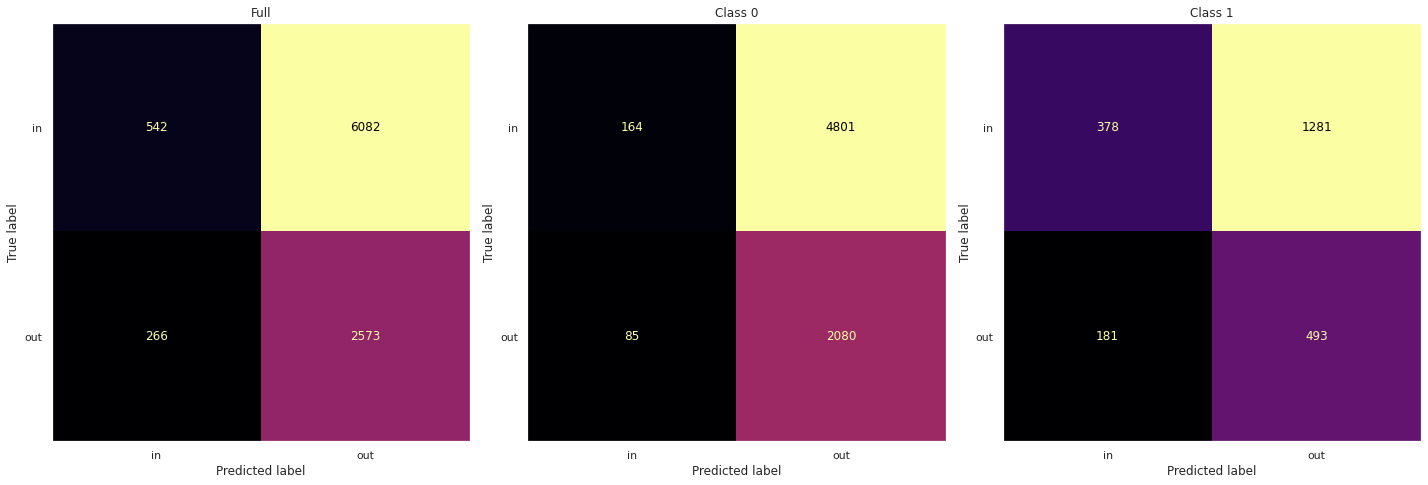

In [19]:
attack_0, attack_1, instances = load_attack_models(PATH)
ensemble0 = KMostSureVotingClassifier(attack_0)
ensemble1 = KMostSureVotingClassifier(attack_1)
evaluate_attack(ensemble0, ensemble1, BB, BB_DATA)

##### Data: `Trepan` on `Black Box Train` Attack: `Noisy` Explainer: `Decision Tree` Filter: `False` Instances Selection: `Quantiles`

Here the trepan dataset was balanced and consisting of $\approx 7000$ elements.

In [20]:
PATH = Path('../../decision_tree/trepan/noisy/adult/experiment_output')
assert PATH.exists()

report full
              precision    recall  f1-score   support

          in       0.70      0.98      0.82      6624
         out       0.37      0.03      0.06      2839

    accuracy                           0.69      9463
   macro avg       0.54      0.50      0.44      9463
weighted avg       0.60      0.69      0.59      9463


Class 0
              precision    recall  f1-score   support

          in       0.70      0.97      0.81      4965
         out       0.38      0.04      0.07      2165

    accuracy                           0.69      7130
   macro avg       0.54      0.51      0.44      7130
weighted avg       0.60      0.69      0.59      7130


Class 1
              precision    recall  f1-score   support

          in       0.71      1.00      0.83      1659
         out       0.22      0.00      0.01       674

    accuracy                           0.71      2333
   macro avg       0.47      0.50      0.42      2333
weighted avg       0.57      0.71      0.59 

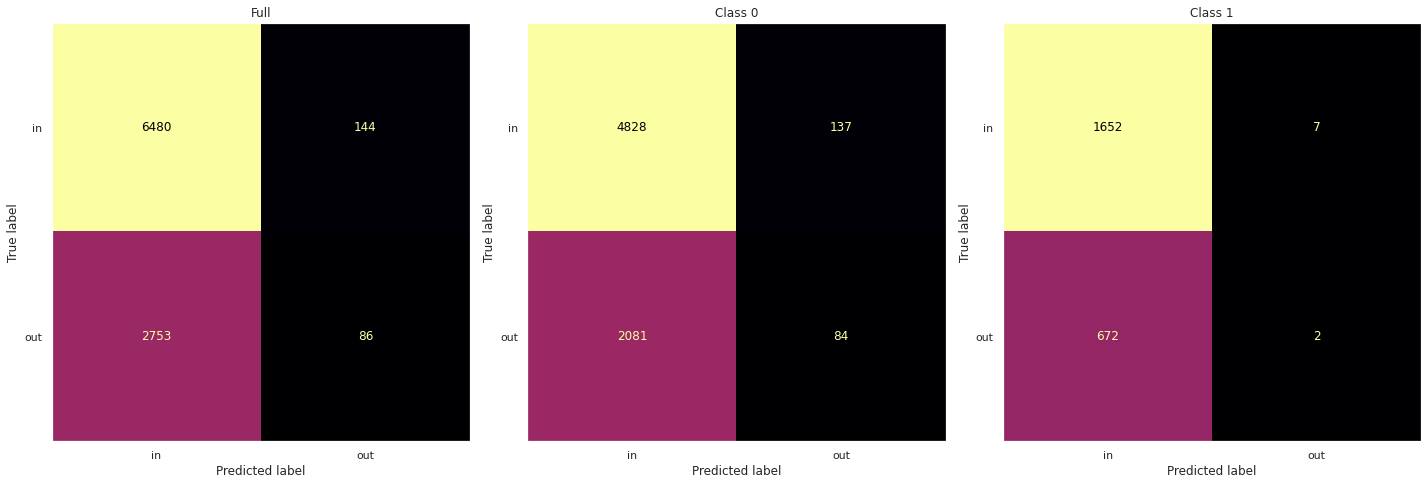

In [21]:
attack_0, attack_1, instances = load_attack_models(PATH)
ensemble0 = KMostSureVotingClassifier(attack_0)
ensemble1 = KMostSureVotingClassifier(attack_1)
evaluate_attack(ensemble0, ensemble1, BB, BB_DATA)

##### Data: `Trepan` on `Black Box Train` Attack: `Noisy` Explainer: `Decision Tree` Filter: `True` Instances Selection: `Quantiles`
Here the trepan dataset was balanced and consisting of $\approx 7000$ elements.

In [22]:
PATH = Path('../../decision_tree/trepan/noisy_filtering/adult/experiment_output/')
assert PATH.exists()

report full
              precision    recall  f1-score   support

          in       0.68      0.13      0.22      6624
         out       0.30      0.86      0.44      2839

    accuracy                           0.35      9463
   macro avg       0.49      0.49      0.33      9463
weighted avg       0.57      0.35      0.28      9463


Class 0
              precision    recall  f1-score   support

          in       0.66      0.03      0.06      4965
         out       0.30      0.97      0.46      2165

    accuracy                           0.31      7130
   macro avg       0.48      0.50      0.26      7130
weighted avg       0.55      0.31      0.18      7130


Class 1
              precision    recall  f1-score   support

          in       0.69      0.43      0.53      1659
         out       0.27      0.52      0.36       674

    accuracy                           0.46      2333
   macro avg       0.48      0.47      0.44      2333
weighted avg       0.57      0.46      0.48 

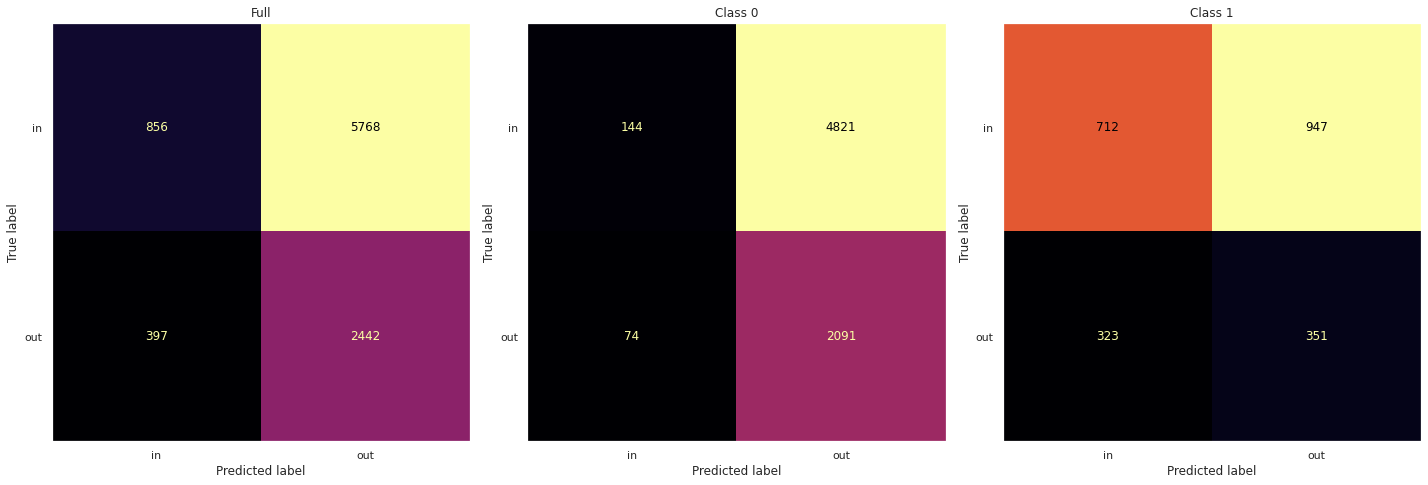

In [23]:
attack_0, attack_1, instances = load_attack_models(PATH)
ensemble0 = KMostSureVotingClassifier(attack_0)
ensemble1 = KMostSureVotingClassifier(attack_1)
evaluate_attack(ensemble0, ensemble1, BB, BB_DATA)

##### Data: `Trepan` on `Black Box Train` Attack: `Statistical` on `Black Box Train` Explainer: `Decision Tree` Filter: `False` Instances Selection: `Quantiles`
Here the trepan dataset was balanced and consisting of $\approx 7000$ elements.

In [24]:
PATH = Path('../../decision_tree/trepan/statistical/adult/experiment_output/')
assert PATH.exists()

report full
              precision    recall  f1-score   support

          in       0.70      0.77      0.73      6624
         out       0.28      0.21      0.24      2839

    accuracy                           0.60      9463
   macro avg       0.49      0.49      0.49      9463
weighted avg       0.57      0.60      0.58      9463


Class 0
              precision    recall  f1-score   support

          in       0.70      1.00      0.82      4965
         out       0.31      0.00      0.00      2165

    accuracy                           0.70      7130
   macro avg       0.50      0.50      0.41      7130
weighted avg       0.58      0.70      0.57      7130


Class 1
              precision    recall  f1-score   support

          in       0.67      0.10      0.17      1659
         out       0.28      0.88      0.43       674

    accuracy                           0.32      2333
   macro avg       0.48      0.49      0.30      2333
weighted avg       0.56      0.32      0.25 

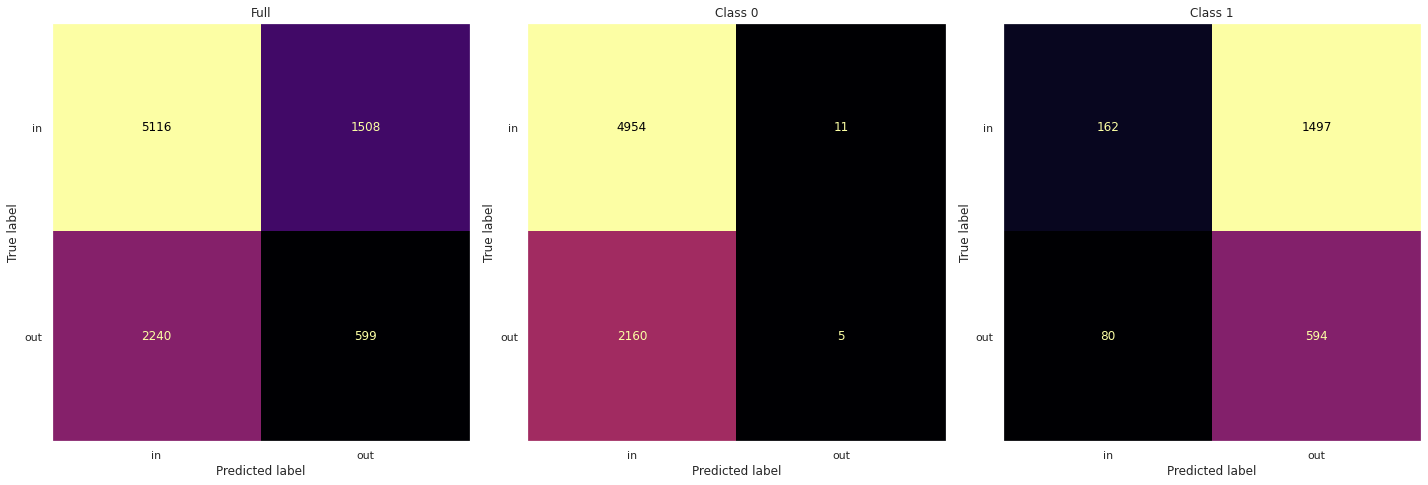

In [25]:
attack_0, attack_1, instances = load_attack_models(PATH)
ensemble0 = KMostSureVotingClassifier(attack_0)
ensemble1 = KMostSureVotingClassifier(attack_1)
evaluate_attack(ensemble0, ensemble1, BB, BB_DATA)

##### Data: `Trepan` on `Black Box Train` Attack: `Statistical` on `Black Box Train` Explainer: `Decision Tree` Filter: `True` Instances Selection: `Quantiles`
Here the trepan dataset was balanced and consisting of $\approx 7000$ elements.

In [26]:
PATH = Path('../../decision_tree/trepan/statistical_filtering/adult/experiment_output/')
assert PATH.exists()

report full
              precision    recall  f1-score   support

          in       0.70      0.99      0.82      6624
         out       0.34      0.01      0.02      2839

    accuracy                           0.70      9463
   macro avg       0.52      0.50      0.42      9463
weighted avg       0.59      0.70      0.58      9463


Class 0
              precision    recall  f1-score   support

          in       0.70      1.00      0.82      4965
         out       0.47      0.01      0.01      2165

    accuracy                           0.70      7130
   macro avg       0.58      0.50      0.42      7130
weighted avg       0.63      0.70      0.58      7130


Class 1
              precision    recall  f1-score   support

          in       0.71      0.97      0.82      1659
         out       0.27      0.02      0.04       674

    accuracy                           0.70      2333
   macro avg       0.49      0.50      0.43      2333
weighted avg       0.58      0.70      0.60 

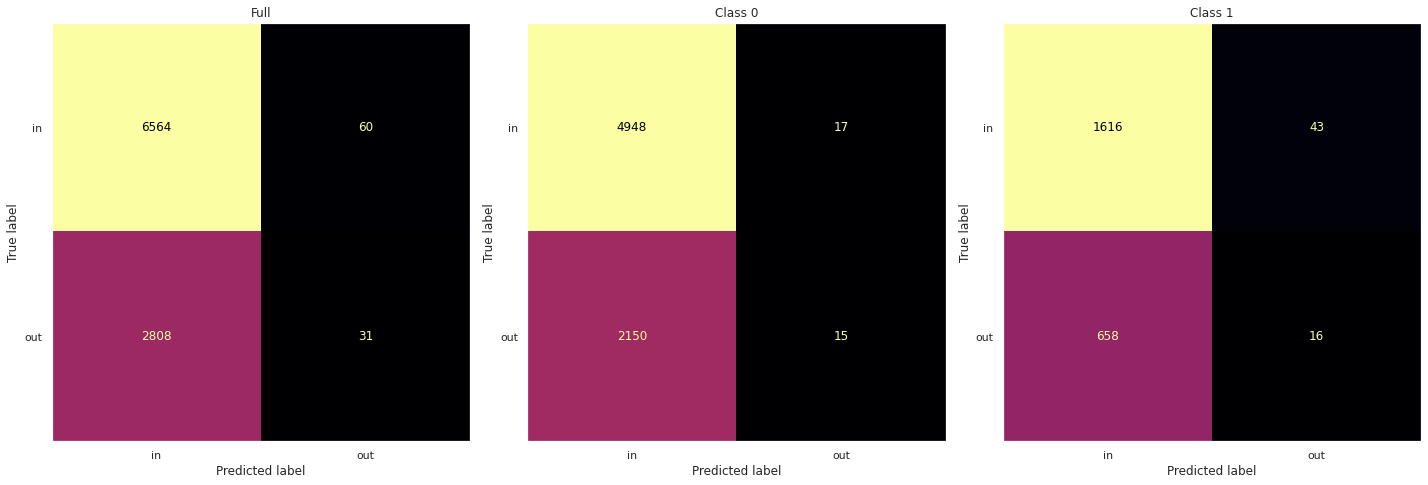

In [27]:
attack_0, attack_1, instances = load_attack_models(PATH)
ensemble0 = KMostSureVotingClassifier(attack_0)
ensemble1 = KMostSureVotingClassifier(attack_1)
evaluate_attack(ensemble0, ensemble1, BB, BB_DATA)

##### Data: `Trepan` on `Black Box Train` Attack: `Statistical` on `Black Box Train` Explainer: `Decision Tree` Filter: `True` Instances Selection: `Quantiles`

Here I didn't balanced the dataset generated by trepan and for each `Decision Tree` I generated a dataset of $80,000$ elements.

In [28]:
PATH = Path('../../decision_tree/trepan/trepan_statistical_filtering_nobalanced/adult/experiment_output/')
assert PATH.exists()

report full
              precision    recall  f1-score   support

          in       0.70      0.78      0.73      6624
         out       0.29      0.21      0.25      2839

    accuracy                           0.61      9463
   macro avg       0.49      0.50      0.49      9463
weighted avg       0.58      0.61      0.59      9463


Class 0
              precision    recall  f1-score   support

          in       0.70      0.98      0.82      4965
         out       0.38      0.03      0.05      2165

    accuracy                           0.69      7130
   macro avg       0.54      0.50      0.43      7130
weighted avg       0.60      0.69      0.58      7130


Class 1
              precision    recall  f1-score   support

          in       0.68      0.17      0.27      1659
         out       0.28      0.81      0.42       674

    accuracy                           0.35      2333
   macro avg       0.48      0.49      0.34      2333
weighted avg       0.57      0.35      0.31 

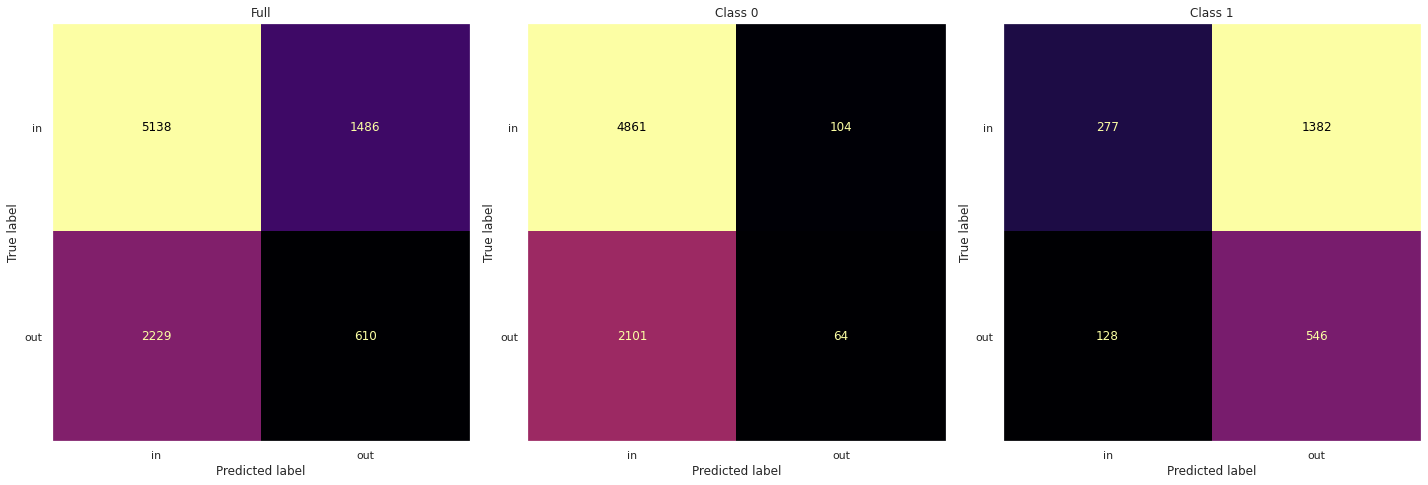

In [29]:
attack_0, attack_1, instances = load_attack_models(PATH)
ensemble0 = KMostSureVotingClassifier(attack_0)
ensemble1 = KMostSureVotingClassifier(attack_1)
evaluate_attack(ensemble0, ensemble1, BB, BB_DATA)

##### Data: `Trepan` on `Black Box Train` Attack: `Statistical` on `Black Box Train` Explainer: `Decision Tree` Filter: `False` Instances Selection: `Quantiles`

Here I didn't balanced the dataset generated by trepan and for each `Decision Tree` I generated a dataset of $80,000$ elements.

In [30]:
PATH = Path('../../decision_tree/trepan/trepan_statistical_nobalanced/adult/experiment_output/')
assert PATH.exists()

report full
              precision    recall  f1-score   support

          in       0.70      0.99      0.82      6624
         out       0.31      0.01      0.02      2839

    accuracy                           0.70      9463
   macro avg       0.50      0.50      0.42      9463
weighted avg       0.58      0.70      0.58      9463


Class 0
              precision    recall  f1-score   support

          in       0.70      0.99      0.82      4965
         out       0.32      0.02      0.03      2165

    accuracy                           0.69      7130
   macro avg       0.51      0.50      0.42      7130
weighted avg       0.58      0.69      0.58      7130


Class 1
              precision    recall  f1-score   support

          in       0.71      1.00      0.83      1659
         out       0.00      0.00      0.00       674

    accuracy                           0.71      2333
   macro avg       0.36      0.50      0.41      2333
weighted avg       0.51      0.71      0.59 

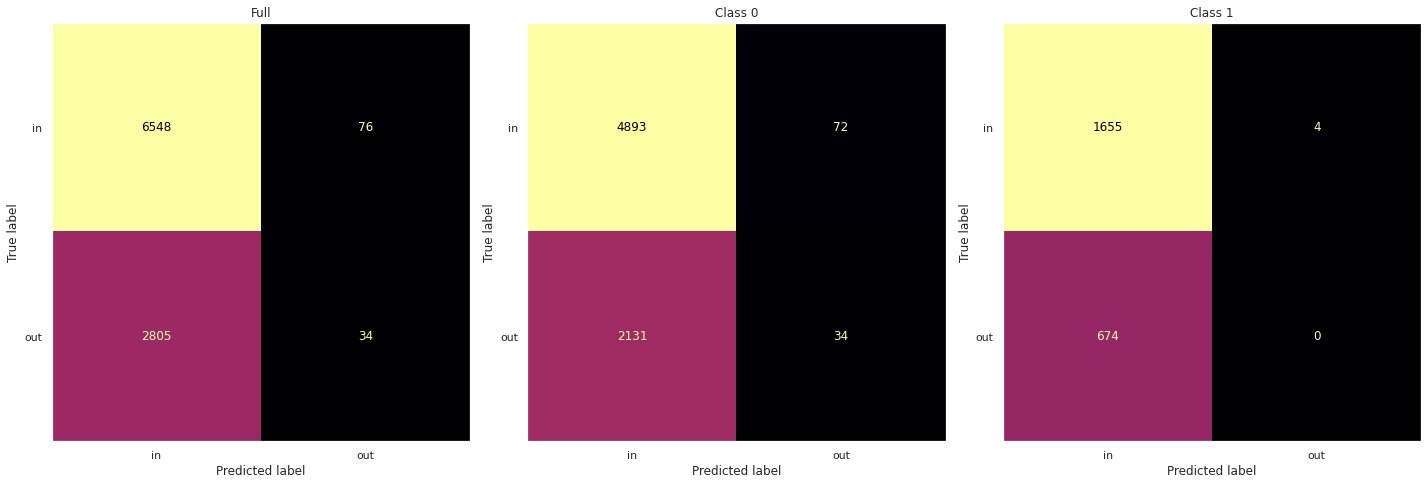

In [31]:
attack_0, attack_1, instances = load_attack_models(PATH)
ensemble0 = KMostSureVotingClassifier(attack_0)
ensemble1 = KMostSureVotingClassifier(attack_1)
evaluate_attack(ensemble0, ensemble1, BB, BB_DATA)

##### Data: `CFS` Attack: `Noisy` on `Black Box Train` Explainer: `Decision Tree`  Instances Selection: `Distance`

In [32]:
PATH = Path('../../decision_tree/CFS/adult/noisy/experiment_output')
assert PATH.exists()

In [33]:
from utils.dataloading.attack_models import load_attack_models

report full
              precision    recall  f1-score   support

          in       0.70      0.97      0.81      6624
         out       0.38      0.05      0.08      2839

    accuracy                           0.69      9463
   macro avg       0.54      0.51      0.45      9463
weighted avg       0.60      0.69      0.59      9463


Class 0
              precision    recall  f1-score   support

          in       0.70      0.96      0.81      4965
         out       0.38      0.06      0.11      2165

    accuracy                           0.68      7130
   macro avg       0.54      0.51      0.46      7130
weighted avg       0.60      0.68      0.60      7130


Class 1
              precision    recall  f1-score   support

          in       0.71      1.00      0.83      1659
         out       0.12      0.00      0.00       674

    accuracy                           0.71      2333
   macro avg       0.42      0.50      0.42      2333
weighted avg       0.54      0.71      0.59 

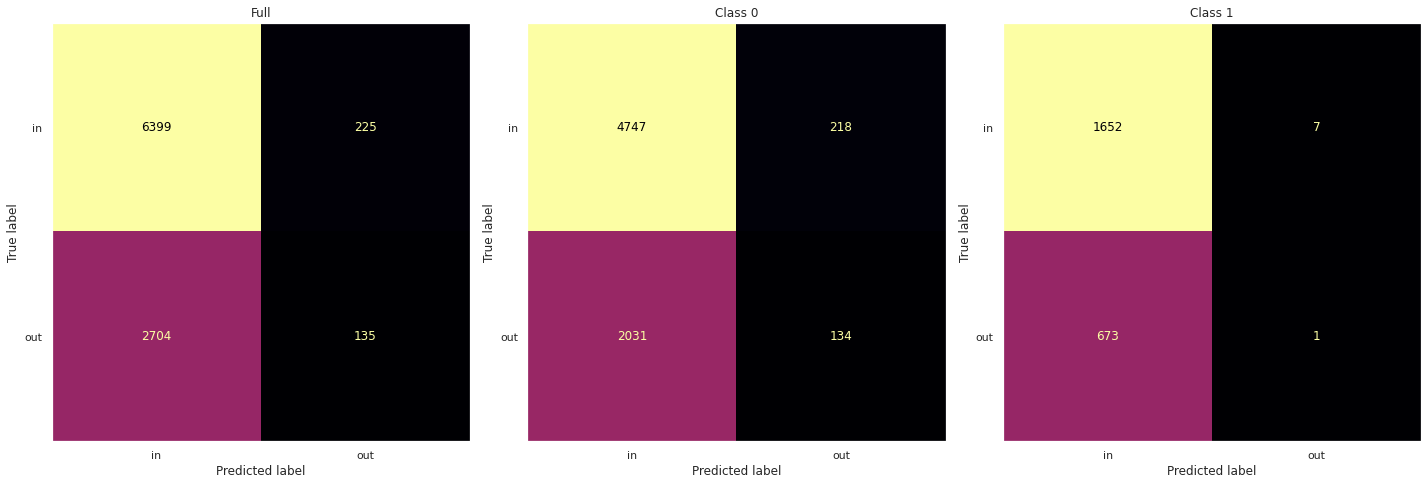

In [34]:
attack_0, attack_1, instances = load_attack_models(PATH, load_instances=False)
ensemble0 = KMostSureVotingClassifier(attack_0)
ensemble1 = KMostSureVotingClassifier(attack_1)
evaluate_attack(ensemble0, ensemble1, BB, BB_DATA)

##### Data: `CFS` Attack: `Statistical` on `Black Box Train` Explainer: `Decision Tree` Instances Selection: `Distance`

In [35]:
PATH = Path('../../decision_tree/CFS/adult/statistical/experiment_output/')
assert PATH.exists()

report full
              precision    recall  f1-score   support

          in       0.70      0.79      0.74      6624
         out       0.29      0.20      0.24      2839

    accuracy                           0.61      9463
   macro avg       0.49      0.50      0.49      9463
weighted avg       0.58      0.61      0.59      9463


Class 0
              precision    recall  f1-score   support

          in       0.70      0.97      0.81      4965
         out       0.39      0.04      0.07      2165

    accuracy                           0.69      7130
   macro avg       0.54      0.51      0.44      7130
weighted avg       0.60      0.69      0.59      7130


Class 1
              precision    recall  f1-score   support

          in       0.68      0.24      0.36      1659
         out       0.28      0.72      0.40       674

    accuracy                           0.38      2333
   macro avg       0.48      0.48      0.38      2333
weighted avg       0.57      0.38      0.37 

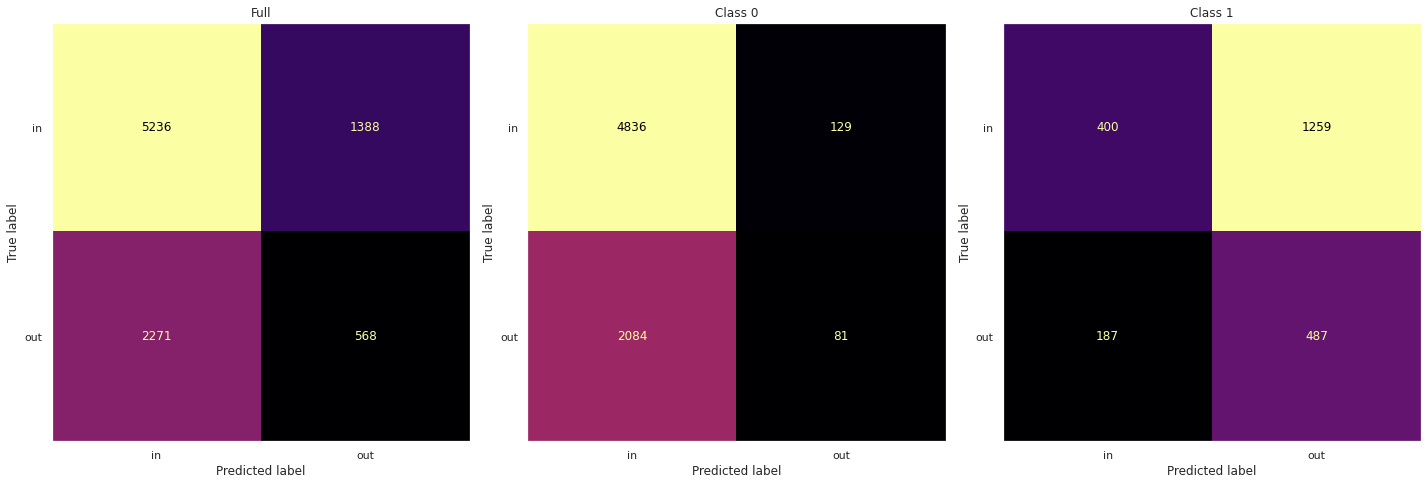

In [36]:
attack_0, attack_1, instances = load_attack_models(PATH, load_instances=False)
ensemble0 = KMostSureVotingClassifier(attack_0)
ensemble1 = KMostSureVotingClassifier(attack_1)
evaluate_attack(ensemble0, ensemble1, BB, BB_DATA)